<a href="https://colab.research.google.com/github/Ahmad-Nedal/Training-TH2-projs/blob/main/Multi_28_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STRATIFIES K-FOLD CROSS VALIDATION
%matplotlib inline
import numpy as num
import pandas as pd
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
# Import Required Modules.
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
from google.colab import drive
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plot

In [2]:
# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/thesis2/606_Full.csv", index_col=0, parse_dates=True)  
df = pd.read_csv('https://raw.githubusercontent.com/Ahmad-Nedal/Training-TH2-projs/main/multi_26F_selected.csv')
X= x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.head()

,AGE,PTGENDER,FA_SCR_L_DTIROI_04_30_14,FA_BCC_L_DTIROI_04_30_14,FA_SUMBCC_DTIROI_04_30_14,MD_SCP_R_DTIROI_04_30_14,MD_CGC_L_DTIROI_04_30_14,MD_CGH_L_DTIROI_04_30_14,MD_CGH_R_DTIROI_04_30_14,MD_FX_ST_L_DTIROI_04_30_14,...,AD_CGH_L_DTIROI_04_30_14,AD_UNC_L_DTIROI_04_30_14,CDRSB,ADAS13,MMSE,RAVLT_immediate,RAVLT_learning,EcogPtMem,EcogSPMem,Diagnosis
0,70.121308,2,0.413947,0.286729,0.302124,0.001005,0.000886,0.000902,0.000893,0.001385,...,0.001167,0.001214,1.5,11,28,42,10,2.375,2.625,2
1,76.978142,2,0.354028,0.376212,0.364153,0.000914,0.000845,0.000905,0.000851,0.001193,...,0.001108,0.001051,0.0,3,30,50,9,1.250,1.000,1
2,83.400000,2,0.329796,0.330138,0.312554,0.001061,0.000826,0.001008,0.000980,0.001980,...,0.001220,0.001158,2.5,9,29,41,3,1.000,2.000,2
3,84.113115,2,0.359625,0.315678,0.288322,0.001209,0.000828,0.001104,0.000955,0.001964,...,0.001322,0.001214,2.5,7,29,40,4,1.000,2.625,2
4,85.118583,2,0.350989,0.299907,0.284379,0.001145,0.000820,0.001000,0.000993,0.001913,...,0.001212,0.001239,0.5,7,30,36,5,1.125,2.125,2


In [3]:
labels, counts = num.unique(y, return_counts=True)
print(labels, counts)

[1 2 3] [171 252  93]


In [4]:
#Encoding Categorical Data
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [5]:
# Create classifier object.
rf = RandomForestClassifier(n_jobs=-1,random_state=0,n_estimators=40, class_weight= 'balanced')
#lr = LogisticRegressionCV(cv=None, random_state=0, solver= 'liblinear', class_weight= 'balanced',)

In [6]:
# Create StratifiedKFold object.

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
Imputer = SimpleImputer(missing_values=num.nan, strategy='mean')
StSc = StandardScaler()

lst_accu_stratified = []
predicted_targets = num.array([])
actual_targets = num.array([])

for train_index, test_index in skf.split(x, y):
	x_train_fold, x_test_fold = x[train_index], x[test_index]
	y_train_fold, y_test_fold = y[train_index], y[test_index]

	x_train_imputed = Imputer.fit_transform(x_train_fold)
	x_train_scaled = StSc.fit_transform(x_train_imputed)

	x_test_imputed = Imputer.transform(x_test_fold)
	x_test_scaled = StSc.transform(x_test_imputed)
 	##
	classifiers=rf.fit(x_train_scaled, y_train_fold)
	predicted_labels = classifiers.predict(x_test_scaled)
	predicted_targets = num.append(predicted_targets, predicted_labels)
	actual_targets = num.append(actual_targets, y_test_fold)
 
	#balanced_accuracy_score(y_true, y_pred)
	lst_accu_stratified.append(balanced_accuracy_score(predicted_targets, actual_targets))

In [7]:
#balanced_accuracy_score(y_true, y_pred)

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


List of possible accuracy: [0.9136462665874431, 0.9309296208378778, 0.9268829524211543, 0.9276532506411149, 0.9098491343651761]

Maximum Accuracy That can be obtained from this model is: 93.09296208378778 %

Minimum Accuracy: 90.98491343651762 %

Overall Accuracy: 92.17922449705533 %

Standard Deviation is: 0.009390862344709023


Normalized confusion matrix


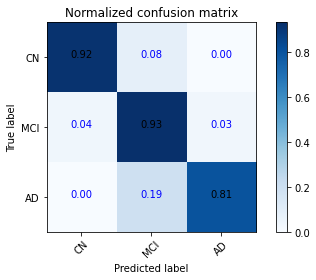

In [8]:
classnames = num.array(['CN', 'MCI', 'AD'], dtype='<U10')
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    num.set_printoptions(precision=2)

   
    plot.figure()
    generate_confusion_matrix(cnf_matrix, classes=classnames, normalize=True, title='Normalized confusion matrix')
    plot.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, num.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plot.imshow(cnf_matrix, interpolation='nearest', cmap=plot.get_cmap('Blues'))
    plot.title(title)
    plot.colorbar()

    tick_marks = num.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.


    for i in range (cnf_matrix.shape[0]):
        for j in range (cnf_matrix.shape[1]):
          plot.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                    color="black" if cnf_matrix[i, j] > thresh else "blue")
          plot.tight_layout()
          plot.ylabel('True label')
          plot.xlabel('Predicted label')

    return cnf_matrix
plot_confusion_matrix(predicted_targets, actual_targets)